<a href="https://colab.research.google.com/github/Tahsinoshin/5th-Semester-Courses/blob/main/Cricket_ODI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import files

# Upload Kaggle API key
uploaded = files.upload()

# Move the uploaded file to the correct directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
# Install the Kaggle library
!pip install kaggle


In [ ]:
# Download the dataset from Kaggle
# !kaggle datasets download -d Noshin_GAN/odi-mens-cricket-match-data-2002-2023
!kaggle datasets download -d utkarshtomar736/odi-mens-cricket-match-data-2002-2023

# Unzip the dataset
!unzip -q dataset-name.zip -d /content/dataset


 73% 5.00M/6.87M [00:00<00:00, 39.9MB/s]
100% 6.87M/6.87M [00:00<00:00, 51.6MB/s]
unzip:  cannot find or open dataset-name.zip, dataset-name.zip.zip or dataset-name.zip.ZIP.


In [ ]:
# Unzip the dataset with the correct file name
!unzip -q odi-mens-cricket-match-data-2002-2023.zip -d /content/dataset


# New Section

In [ ]:
from google.colab import files

# Upload the ODI_Match_Info.csv file
uploaded = files.upload()


Saving ODI_Match_info.csv to ODI_Match_info.csv


In [ ]:
import pandas as pd

# Load the uploaded CSV file into a DataFrame
file_path_info = next(iter(uploaded))
df_info = pd.read_csv(file_path_info)

# Display the first few rows of the DataFrame
df_info.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48,0,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,1395701,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86,0,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,1389388,2023/24,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
4,1395700,2023,Dhaka,2023/09/21,New Zealand,Bangladesh,Bangladesh,field,normal,0,NaN,0,0,NaN,"Shere Bangla National Stadium, Mirpur",Nitin Menon,Sharfuddoula,M Erasmus


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'MatchWinner' column
df_info['winner_encoded'] = label_encoder.fit_transform(df_info['winner'])

# Display the unique values and their corresponding encoded values
print("Unique values in 'MatchWinner':", df_info['winner'].unique())
print("Encoded values in 'MatchWinner_encoded':", df_info['winner_encoded'].unique())


Unique values in 'MatchWinner': ['India' 'England' 'New Zealand' nan 'South Africa' 'Bangladesh'
 'Sri Lanka' 'Australia' 'Pakistan' 'West Indies' 'Afghanistan'
 'Netherlands' 'United Arab Emirates' 'Scotland' 'Ireland' 'Nepal'
 'Zimbabwe' 'Oman' 'Canada' 'United States of America' 'Namibia' 'Jersey'
 'Papua New Guinea' 'Hong Kong' 'Kenya' 'Bermuda' 'Asia XI' 'Africa XI']
Encoded values in 'MatchWinner_encoded': [ 9  7 16 27 21  4 22  3 18 25  0 15 23 20 10 14 26 17  6 24 13 11 19  8
 12  5  2  1]


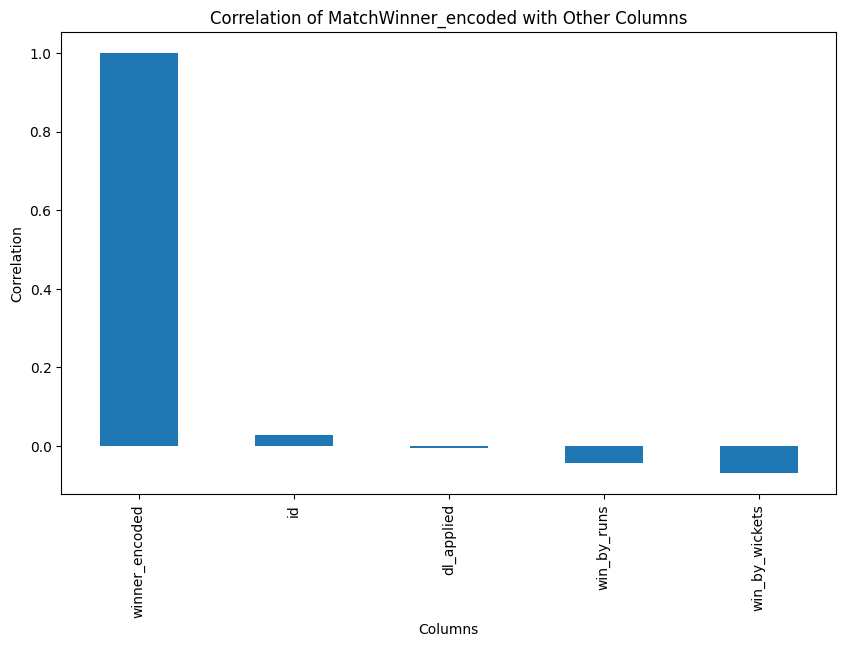

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded CSV file into a DataFrame
file_path_info = next(iter(uploaded))
df_info = pd.read_csv(file_path_info)

# Encode 'MatchWinner' column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_info['winner_encoded'] = label_encoder.fit_transform(df_info['winner'])

# Identify numerical columns for correlation
numerical_columns = df_info.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation between 'MatchWinner_encoded' and other numerical columns
correlation_with_winner = df_info[numerical_columns].corrwith(df_info['winner_encoded'])

# Plot the correlation
plt.figure(figsize=(10, 6))
correlation_with_winner.sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of MatchWinner with Other Columns')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.show()


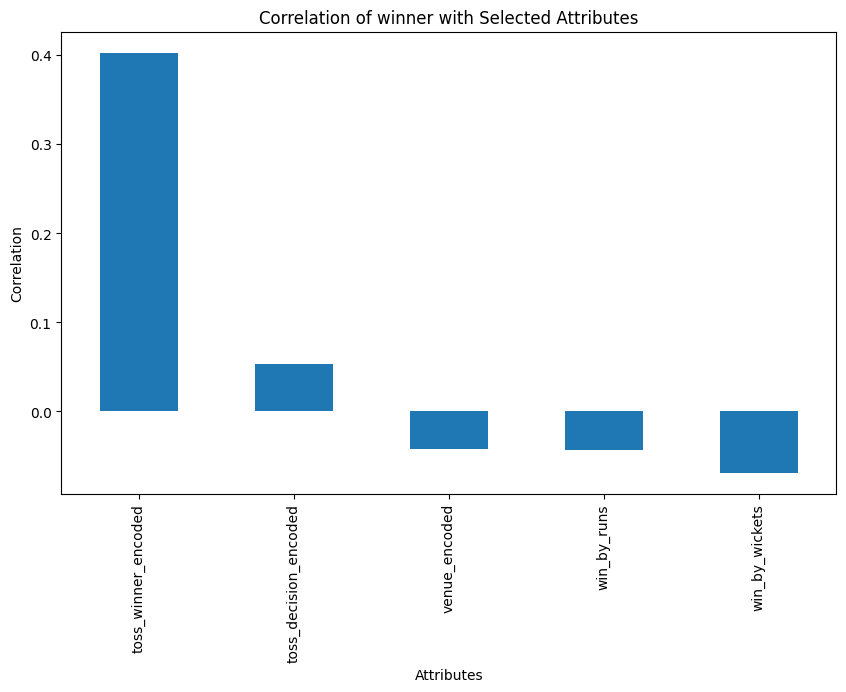

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded CSV file into a DataFrame
file_path_info = next(iter(uploaded))
df_info = pd.read_csv(file_path_info)

# Encode 'winner' column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_info['winner_encoded'] = label_encoder.fit_transform(df_info['winner'])

# Encode categorical columns 'toss_winner', 'toss_decision', and 'venue'
df_info['toss_winner_encoded'] = label_encoder.fit_transform(df_info['toss_winner'])
df_info['toss_decision_encoded'] = label_encoder.fit_transform(df_info['toss_decision'])
df_info['venue_encoded'] = label_encoder.fit_transform(df_info['venue'])

# Define the attributes to consider for correlation
attributes = ['toss_winner_encoded', 'toss_decision_encoded', 'win_by_runs', 'win_by_wickets', 'venue_encoded']

# Calculate correlation between 'winner_encoded' and the selected attributes
correlation_with_winner = df_info[attributes + ['winner_encoded']].corr()['winner_encoded']

# Plot the correlation
plt.figure(figsize=(10, 6))
correlation_with_winner[:-1].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of winner with Selected Attributes')
plt.xlabel('Attributes')
plt.ylabel('Correlation')
plt.show()


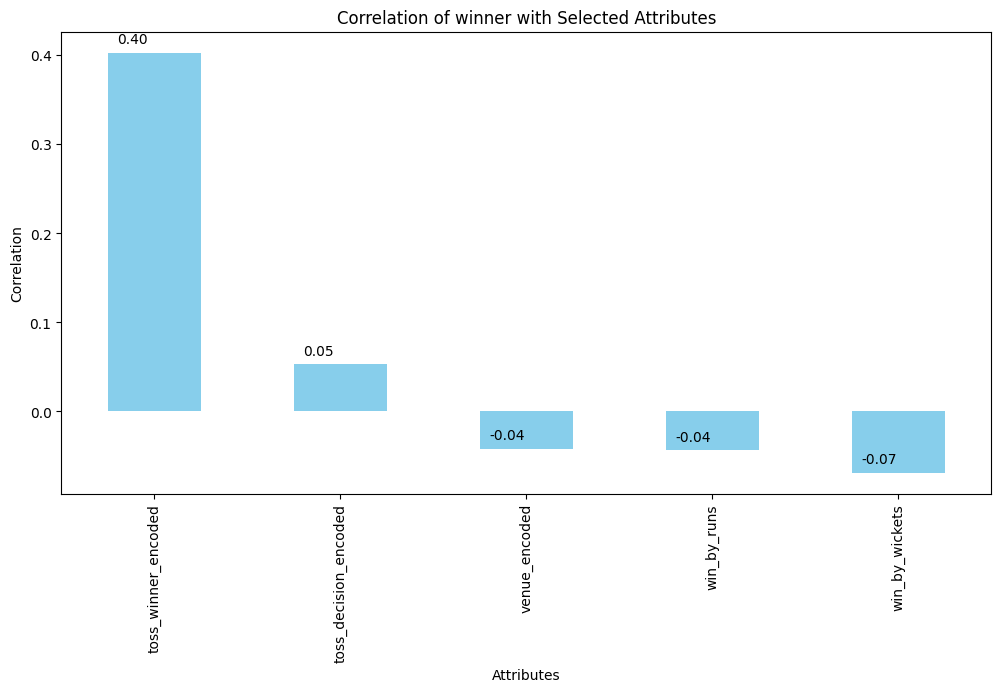

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded CSV file into a DataFrame
file_path_info = next(iter(uploaded))
df_info = pd.read_csv(file_path_info)

# Encode 'winner' column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_info['winner_encoded'] = label_encoder.fit_transform(df_info['winner'])

# Encode categorical columns 'toss_winner', 'toss_decision', and 'venue'
df_info['toss_winner_encoded'] = label_encoder.fit_transform(df_info['toss_winner'])
df_info['toss_decision_encoded'] = label_encoder.fit_transform(df_info['toss_decision'])
df_info['venue_encoded'] = label_encoder.fit_transform(df_info['venue'])

# Define the attributes to consider for correlation
attributes = ['toss_winner_encoded', 'toss_decision_encoded', 'win_by_runs', 'win_by_wickets', 'venue_encoded']

# Calculate correlation between 'winner_encoded' and the selected attributes
correlation_with_winner = df_info[attributes + ['winner_encoded']].corr()['winner_encoded']

# Plot the correlation
plt.figure(figsize=(12, 6))

# Plot the bar chart
ax = correlation_with_winner[:-1].sort_values(ascending=False).plot(kind='bar', color='skyblue')

# Display the correlation values on the bar chart
for i, v in enumerate(correlation_with_winner[:-1].sort_values(ascending=False)):
    ax.text(i - 0.2, v + 0.01, f'{v:.2f}', color='black')

plt.title('Correlation of winner with Selected Attributes')
plt.xlabel('Attributes')
plt.ylabel('Correlation')
plt.show()


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving dfMatchInfo_new.csv to dfMatchInfo_new.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded CSV file into a DataFrame
#file_path = '/path/to/dfMatchInfo_new.csv'  # Replace with the actual path to your file
df_match_info = pd.read_csv(file_path)

# Identify categorical columns for encoding
categorical_columns = df_match_info.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
df_match_info_encoded = pd.get_dummies(df_match_info, columns=categorical_columns, drop_first=True)

# Identify numerical columns for correlation
numerical_columns = df_match_info_encoded.select_dtypes(include=['int64', 'float64']).columns

# Encode 'tossDecision'
#df_match_info_encoded['tossDecision_encoded'] = pd.get_dummies(df_match_info['tossDecision'], drop_first=True)['field']

# Add 'tossDecision_encoded' to the list of attributes for correlation
#attributes = numerical_columns.tolist() + ['tossDecision_encoded']

# Calculate correlation between 'winner' and selected attributes
correlation_with_winner_and_toss = df_match_info_encoded[attributes + ['winner']].corr()['winner']

# Plot the correlation
plt.figure(figsize=(14, 6))

# Plot the bar chart
ax = correlation_with_winner_and_toss[:-1].sort_values(ascending=False).plot(kind='bar', color='skyblue')

# Display the correlation values on the bar chart
for i, v in enumerate(correlation_with_winner_and_toss[:-1].sort_values(ascending=False)):
    ax.text(i - 0.2, v + 0.01, f'{v:.2f}', color='black')

plt.title('Correlation of winner with Other Attributes (including tossDecision)')
plt.xlabel('Attributes')
plt.ylabel('Correlation')
plt.show()


KeyError: ignored

In [ ]:
import os

# List files in the current working directory
files_in_directory = os.listdir()
print(files_in_directory)


['.config', 'dfMatchInfo_new.csv', 'drive', 'ODI_Match_info.csv', 'sample_data']


In [ ]:
file_path = os.path.join(os.getcwd(), 'dfMatchInfo_new.csv')
